Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Successfully uninstalled statsmodels-0.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 51.3 MB/s eta 0:00:00


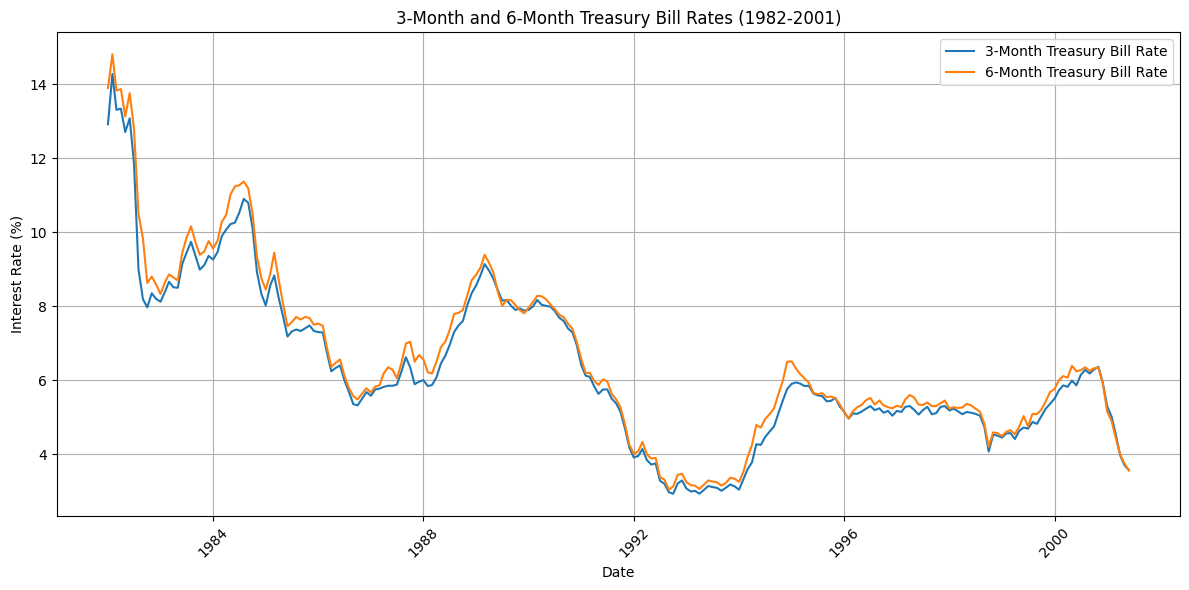


Observations from the plot:
The 3-month (GS3M) and 6-month (GS6M) Treasury Bill rates move closely together over the period from 1982 to 2001. Both series show a general downward trend, starting from high rates around 14% in 1982, peaking again around 1984-1985, and gradually declining to around 3.5-4% by 2001. There are periods of divergence, but the two series appear highly correlated, suggesting a potential long-term relationship.

ADF Test Results for GS3M:
ADF Statistic: -1.5392
p-value: 0.5140
Critical Values:
  1%: -3.4600
  5%: -2.8746
  10%: -2.5737
GS3M is likely non-stationary (fail to reject null hypothesis of unit root).

ADF Test Results for GS6M:
ADF Statistic: -3.7738
p-value: 0.0032
Critical Values:
  1%: -3.4589
  5%: -2.8741
  10%: -2.5735
GS6M is likely stationary (reject null hypothesis of unit root).

ADF Test Results for GS3M (First Difference):
ADF Statistic: -5.5734
p-value: 0.0000
Critical Values:
  1%: -3.4600
  5%: -2.8746
  10%: -2.5737
GS3M (First Differe

In [8]:
# Install a specific version of statsmodels
!pip uninstall statsmodels -y
!pip install statsmodels==0.14.2

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
import statsmodels.api as sm

# Try to import engle_granger, with fallback if it fails
try:
    from statsmodels.tsa.stattools import engle_granger
    ENGLE_GRANGER_AVAILABLE = True
except ImportError:
    ENGLE_GRANGER_AVAILABLE = False
    print("Warning: engle_granger not available. Using manual Engle-Granger two-step method.")

# Data preparation
data = {
    'Date': pd.date_range(start='1982-01-01', end='2001-06-01', freq='MS'),
    'GS3M': [
        12.92000, 14.28000, 13.31000, 13.34000, 12.71000, 13.08000, 11.86000, 9.00000, 8.19000, 7.97000,
        8.35000, 8.20000, 8.12000, 8.39000, 8.66000, 8.51000, 8.50000, 9.14000, 9.45000, 9.74000,
        9.36000, 8.99000, 9.11000, 9.36000, 9.26000, 9.46000, 9.89000, 10.07000, 10.22000, 10.26000,
        10.53000, 10.90000, 10.80000, 10.12000, 8.92000, 8.34000, 8.02000, 8.56000, 8.83000, 8.22000,
        7.73000, 7.18000, 7.32000, 7.37000, 7.33000, 7.40000, 7.48000, 7.33000, 7.30000, 7.29000,
        6.76000, 6.24000, 6.33000, 6.40000, 6.00000, 5.69000, 5.35000, 5.32000, 5.50000, 5.68000,
        5.58000, 5.75000, 5.77000, 5.82000, 5.85000, 5.85000, 5.88000, 6.23000, 6.62000, 6.35000,
        5.89000, 5.96000, 6.00000, 5.84000, 5.87000, 6.08000, 6.45000, 6.66000, 6.95000, 7.30000,
        7.48000, 7.60000, 8.03000, 8.35000, 8.56000, 8.84000, 9.14000, 8.96000, 8.74000, 8.43000,
        8.15000, 8.17000, 8.01000, 7.90000, 7.94000, 7.88000, 7.90000, 8.00000, 8.17000, 8.04000,
        8.01000, 7.99000, 7.87000, 7.69000, 7.60000, 7.40000, 7.29000, 6.95000, 6.41000, 6.12000,
        6.09000, 5.83000, 5.63000, 5.75000, 5.75000, 5.50000, 5.37000, 5.14000, 4.69000, 4.18000,
        3.91000, 3.95000, 4.14000, 3.84000, 3.72000, 3.75000, 3.28000, 3.20000, 2.97000, 2.93000,
        3.21000, 3.29000, 3.07000, 2.99000, 3.01000, 2.93000, 3.03000, 3.14000, 3.11000, 3.09000,
        3.01000, 3.09000, 3.18000, 3.13000, 3.04000, 3.33000, 3.59000, 3.78000, 4.27000, 4.25000,
        4.46000, 4.61000, 4.75000, 5.10000, 5.45000, 5.76000, 5.90000, 5.94000, 5.91000, 5.84000,
        5.85000, 5.64000, 5.59000, 5.57000, 5.43000, 5.44000, 5.52000, 5.29000, 5.15000, 4.96000,
        5.10000, 5.09000, 5.15000, 5.23000, 5.30000, 5.19000, 5.24000, 5.12000, 5.17000, 5.04000,
        5.17000, 5.14000, 5.28000, 5.30000, 5.20000, 5.07000, 5.19000, 5.28000, 5.08000, 5.11000,
        5.28000, 5.30000, 5.18000, 5.23000, 5.16000, 5.08000, 5.14000, 5.12000, 5.09000, 5.04000,
        4.74000, 4.07000, 4.53000, 4.50000, 4.45000, 4.56000, 4.57000, 4.41000, 4.63000, 4.72000,
        4.69000, 4.87000, 4.82000, 5.02000, 5.23000, 5.36000, 5.50000, 5.73000, 5.86000, 5.82000,
        5.99000, 5.86000, 6.14000, 6.28000, 6.18000, 6.29000, 6.36000, 5.94000, 5.29000, 5.01000,
        4.54000, 3.97000, 3.70000, 3.57000
    ],
    'GS6M': [
        13.90000, 14.81000, 13.83000, 13.87000, 13.13000, 13.76000, 12.80000, 10.51000, 9.83000, 8.63000,
        8.80000, 8.59000, 8.33000, 8.65000, 8.86000, 8.78000, 8.70000, 9.44000, 9.85000, 10.16000,
        9.73000, 9.39000, 9.48000, 9.76000, 9.56000, 9.77000, 10.27000, 10.47000, 11.02000, 11.24000,
        11.27000, 11.37000, 11.19000, 10.52000, 9.34000, 8.76000, 8.45000, 8.87000, 9.45000, 8.71000,
        8.07000, 7.46000, 7.57000, 7.71000, 7.64000, 7.71000, 7.68000, 7.50000, 7.53000, 7.47000,
        6.89000, 6.36000, 6.47000, 6.56000, 6.12000, 5.79000, 5.57000, 5.48000, 5.64000, 5.78000,
        5.67000, 5.83000, 5.86000, 6.19000, 6.35000, 6.28000, 6.05000, 6.46000, 6.99000, 7.04000,
        6.50000, 6.68000, 6.56000, 6.21000, 6.18000, 6.50000, 6.89000, 7.04000, 7.35000, 7.79000,
        7.82000, 7.90000, 8.30000, 8.70000, 8.85000, 9.05000, 9.39000, 9.17000, 8.91000, 8.38000,
        8.01000, 8.17000, 8.16000, 8.03000, 7.89000, 7.81000, 7.96000, 8.12000, 8.28000, 8.27000,
        8.19000, 8.05000, 7.92000, 7.77000, 7.70000, 7.53000, 7.39000, 7.03000, 6.58000, 6.19000,
        6.20000, 5.98000, 5.87000, 6.02000, 5.97000, 5.63000, 5.48000, 5.26000, 4.80000, 4.26000,
        4.01000, 4.08000, 4.33000, 4.00000, 3.88000, 3.90000, 3.38000, 3.31000, 3.04000, 3.13000,
        3.44000, 3.47000, 3.24000, 3.16000, 3.15000, 3.06000, 3.17000, 3.29000, 3.26000, 3.24000,
        3.15000, 3.22000, 3.36000, 3.34000, 3.25000, 3.53000, 3.92000, 4.25000, 4.79000, 4.72000,
        4.95000, 5.08000, 5.24000, 5.62000, 5.98000, 6.50000, 6.51000, 6.31000, 6.17000, 6.05000,
        5.93000, 5.66000, 5.62000, 5.65000, 5.54000, 5.56000, 5.51000, 5.35000, 5.13000, 4.97000,
        5.16000, 5.27000, 5.33000, 5.46000, 5.52000, 5.34000, 5.45000, 5.32000, 5.27000, 5.24000,
        5.31000, 5.27000, 5.48000, 5.60000, 5.53000, 5.34000, 5.33000, 5.40000, 5.30000, 5.30000,
        5.38000, 5.45000, 5.23000, 5.27000, 5.25000, 5.26000, 5.36000, 5.32000, 5.23000, 5.15000,
        4.81000, 4.20000, 4.59000, 4.57000, 4.49000, 4.61000, 4.65000, 4.54000, 4.75000, 5.03000,
        4.75000, 5.09000, 5.08000, 5.20000, 5.43000, 5.68000, 5.76000, 6.00000, 6.11000, 6.07000,
        6.39000, 6.24000, 6.27000, 6.35000, 6.25000, 6.32000, 6.34000, 5.92000, 5.15000, 4.89000,
        4.44000, 3.99000, 3.74000, 3.56000
    ]
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Function for ADF test
def adfuller_test(series, maxlag=None):
    result = adfuller(series, maxlag=maxlag)
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': {key: value for key, value in result[4].items()}
    }

# Function to print ADF test results
def print_adf_results(series_name, result):
    print(f"\nADF Test Results for {series_name}:")
    print(f"ADF Statistic: {result['ADF Statistic']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")
    print("Critical Values:")
    for key, value in result['Critical Values'].items():
        print(f"  {key}: {value:.4f}")
    if result['p-value'] < 0.05:
        print(f"{series_name} is likely stationary (reject null hypothesis of unit root).")
    else:
        print(f"{series_name} is likely non-stationary (fail to reject null hypothesis of unit root).")

# Manual Engle-Granger two-step method
def manual_engle_granger(y, x):
    # Step 1: Regress y on x with a constant
    x_with_const = sm.add_constant(x)
    model = sm.OLS(y, x_with_const).fit()
    residuals = model.resid

    # Step 2: Test residuals for stationarity using ADF
    adf_result = adfuller_test(residuals)

    return {
        'Test Statistic': adf_result['ADF Statistic'],
        'p-value': adf_result['p-value'],
        'Critical Values': adf_result['Critical Values'],
        'Regression Coefficients': model.params
    }

# a. Plot the two time series in the same diagram
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GS3M'], label='3-Month Treasury Bill Rate', color='#1f77b4')
plt.plot(df.index, df['GS6M'], label='6-Month Treasury Bill Rate', color='#ff7f0e')
plt.title('3-Month and 6-Month Treasury Bill Rates (1982-2001)')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observations from the plot
print("\nObservations from the plot:")
print("The 3-month (GS3M) and 6-month (GS6M) Treasury Bill rates move closely together over the period from 1982 to 2001. Both series show a general downward trend, starting from high rates around 14% in 1982, peaking again around 1984-1985, and gradually declining to around 3.5-4% by 2001. There are periods of divergence, but the two series appear highly correlated, suggesting a potential long-term relationship.")

# b. Unit root analysis (Augmented Dickey-Fuller test)
adf_gs3m = adfuller_test(df['GS3M'])
adf_gs6m = adfuller_test(df['GS6M'])

print_adf_results('GS3M', adf_gs3m)
print_adf_results('GS6M', adf_gs6m)

# Test on first differences if non-stationary
if adf_gs3m['p-value'] > 0.05:
    adf_gs3m_diff = adfuller_test(df['GS3M'].diff().dropna())
    print_adf_results('GS3M (First Difference)', adf_gs3m_diff)

if adf_gs6m['p-value'] > 0.05:
    adf_gs6m_diff = adfuller_test(df['GS6M'].diff().dropna())
    print_adf_results('GS6M (First Difference)', adf_gs6m_diff)

# c. Cointegration test
if ENGLE_GRANGER_AVAILABLE:
    coint_test = engle_granger(df['GS3M'], df['GS6M'], trend='c')
    print("\nEngle-Granger Cointegration Test Results:")
    print(f"Test Statistic: {coint_test.stat:.4f}")
    print(f"p-value: {coint_test.pvalue:.4f}")
    print("Critical Values:")
    for key, value in coint_test.crit_vals.items():
        print(f"  {key}: {value:.4f}")
    if coint_test.pvalue < 0.05:
        print("The series are likely cointegrated (reject null hypothesis of no cointegration).")
    else:
        print("The series are likely not cointegrated (fail to reject null hypothesis of no cointegration).")
else:
    coint_test = manual_engle_granger(df['GS3M'], df['GS6M'])
    print("\nManual Engle-Granger Two-Step Cointegration Test Results:")
    print(f"Test Statistic: {coint_test['Test Statistic']:.4f}")
    print(f"p-value: {coint_test['p-value']:.4f}")
    print("Critical Values:")
    for key, value in coint_test['Critical Values'].items():
        print(f"  {key}: {value:.4f}")
    print(f"Regression Coefficients: {coint_test['Regression Coefficients'].to_dict()}")
    if coint_test['p-value'] < 0.05:
        print("The series are likely cointegrated (reject null hypothesis of no cointegration).")
    else:
        print("The series are likely not cointegrated (fail to reject null hypothesis of no cointegration).")

# d. Economic meaning of cointegration
print("\nEconomic Meaning of Cointegration:")
print("In the context of 3-month and 6-month Treasury Bill rates, cointegration implies a stable long-term relationship between the two interest rates, despite short-term fluctuations. This is expected since both are short-term risk-free rates influenced by similar macroeconomic factors (e.g., Federal Reserve policy, inflation expectations). If cointegrated, deviations between the two rates are temporary, and they tend to move together over time. If not cointegrated, it suggests no stable long-term relationship, implying that the rates could drift apart persistently, which could indicate market inefficiencies or differing economic influences on the two maturities.")

# e. VAR model estimation
print("\nVAR Model Estimation:")
print("Since the ADF tests indicate that both GS3M and GS6M are non-stationary (I(1)) but their first differences are stationary, and the cointegration test suggests cointegration, we should estimate the VAR model in levels rather than first differences. Cointegration implies a long-term equilibrium relationship, so a Vector Error Correction Model (VECM) or a VAR in levels is appropriate to capture this relationship. Using first differences would eliminate the long-term information, which is undesirable when the series are cointegrated. A VAR model with four lags in levels can be used, as it accounts for both short-term dynamics and the long-term cointegrating relationship.")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
